<font color = #1D8348 size = '5' style = 'font-family: Impact'> Importing warnings </font>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

<font color = #1D8348 size = '5' style = 'font-family: Impact'> Importing all necessary libraries </font>

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
import statsmodels.tsa.api as smt
from sklearn.metrics import r2_score

<font color = #1D8348 size = '5' style = 'font-family: Impact'> Reading the csv file - **'day.csv'** into bike</font>

In [3]:
# Reading the data
bike=pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Converting the weather column to categorical variables.
def cat(x):
    if x==1:
        return('Clear,cloudy')
    elif x==2:
        return('Mist,clouds')
    elif x==3:
        return('Light Rain')
    else:
        return('Heavy Rain')


In [6]:
# Applying the function to the bike list
bike.weathersit=bike.weathersit.apply(cat)


In [7]:
# Converting the seasom column to categorical variables.
def cat1(x):
    if x==1:
        return('spring')
    elif x==2:
        return('summer')
    elif x==3:
        return('fall')
    else:
        return('winter')


In [8]:
# Applying the function to the bike list
bike.season=bike.season.apply(cat1)


In [9]:
# defining function to change day column to categorical variable
def cat2(x):
    if x==0:
        return('sun')
    elif x==1:
        return('mon')
    elif x==2:
        return('tue')
    elif x==3:
        return('wed')
    elif x==4:
        return('thurs')
    elif x==5:
        return('fri')
    else:
        return('sat')



In [10]:
#applying the function to bike list
bike.weekday=bike.weekday.apply(cat2)

In [11]:
# defining function to change mnth column to categorical variable
def cat3(x):
    if x==1:
        return('jan')
    elif x==2:
        return('feb')
    elif x==3:
        return('mar')
    elif x==4:
        return('apr')
    elif x==5:
        return('may')
    elif x==6:
        return('jun')
    elif x==7:
        return('jul')
    elif x==8:
        return('aug')
    elif x==9:
        return('sep')
    elif x==10:
        return('oct')
    elif x==11:
        return('nov')
    else:
        return('dec')


In [12]:
bike['mnth'] = bike['mnth'].apply(cat3)

In [13]:
#cchecking top 5 rows of bike dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,"Mist,clouds",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,"Mist,clouds",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,"Clear,cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,"Clear,cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,"Clear,cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


<font color = #1D8348 size = '5' style = 'font-family: Impact'> Data Understanding </font>

In [14]:
#check the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<font color=#2980B9  size= 3 style='font-family : courier'>
There are 0 NULL values in the bike data frame.
    <br>
    

</font>

In [15]:

#checking for collinearity between temp and atemp
bike[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


<font color=#2980B9  size= 3 style='font-family : courier'>
temp and atemp are highly correlated.so, we can drop one of the variables
    <br>
    

</font>

In [16]:
#checking info of bike dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


<font color=#2980B9  size= 3 style='font-family : courier'>
There are 11  numeric columns and 5 categorical variables.
    <br>
    

</font>


<font color=#D35400 size=6  style = 'font-family: Georgia'><b>Data Visualization</b></font>

<font color = #1D8348 size = '5' style = 'font-family: Impact'>Exploratiry Data Analysis </font>

<font color = #1D8348 size = '5' style = 'font-family: Impact'>Checking for outliers </font>

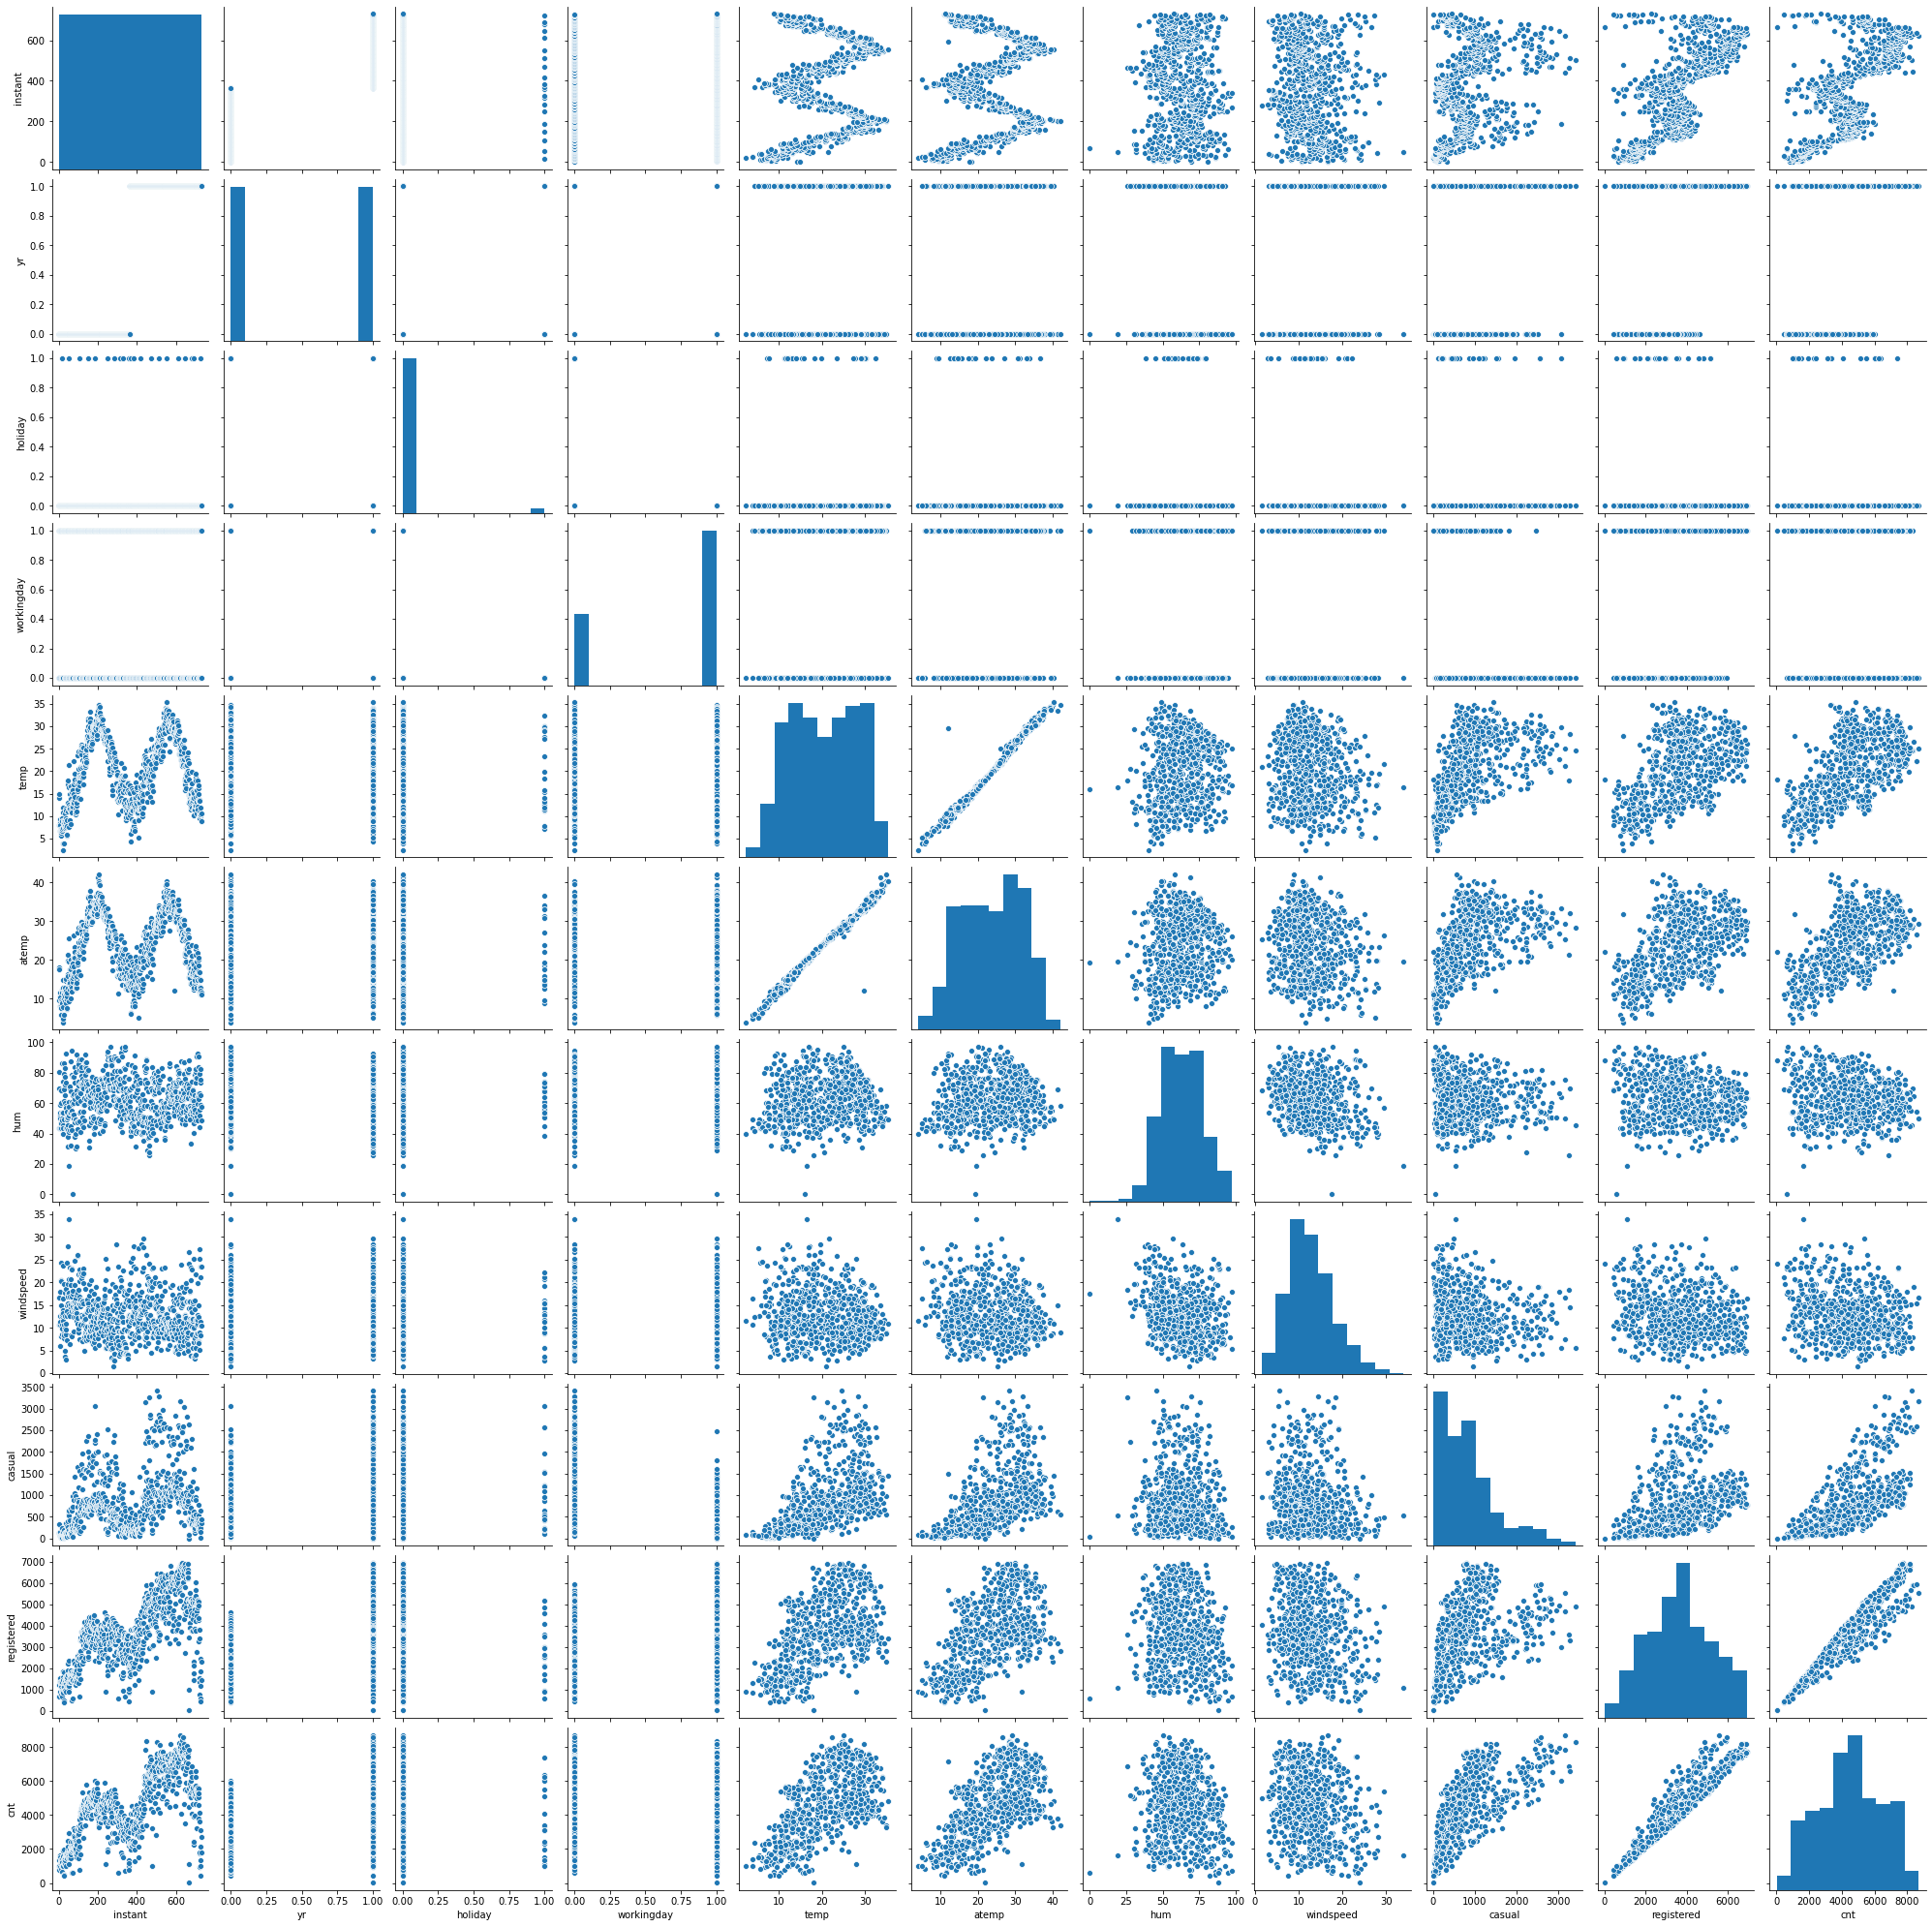

In [17]:
sns.pairplot(bike)
plt.show()


<font color=#2980B9  size= 3 style='font-family : courier'>
1. We could see that Registered variable is highly correlated with target variable 'CNT'.

2. Temp and atemp are highly correlated and they both have almost same correlation with other variables
    <br>
    

</font>

### Visualising Categorical Variables





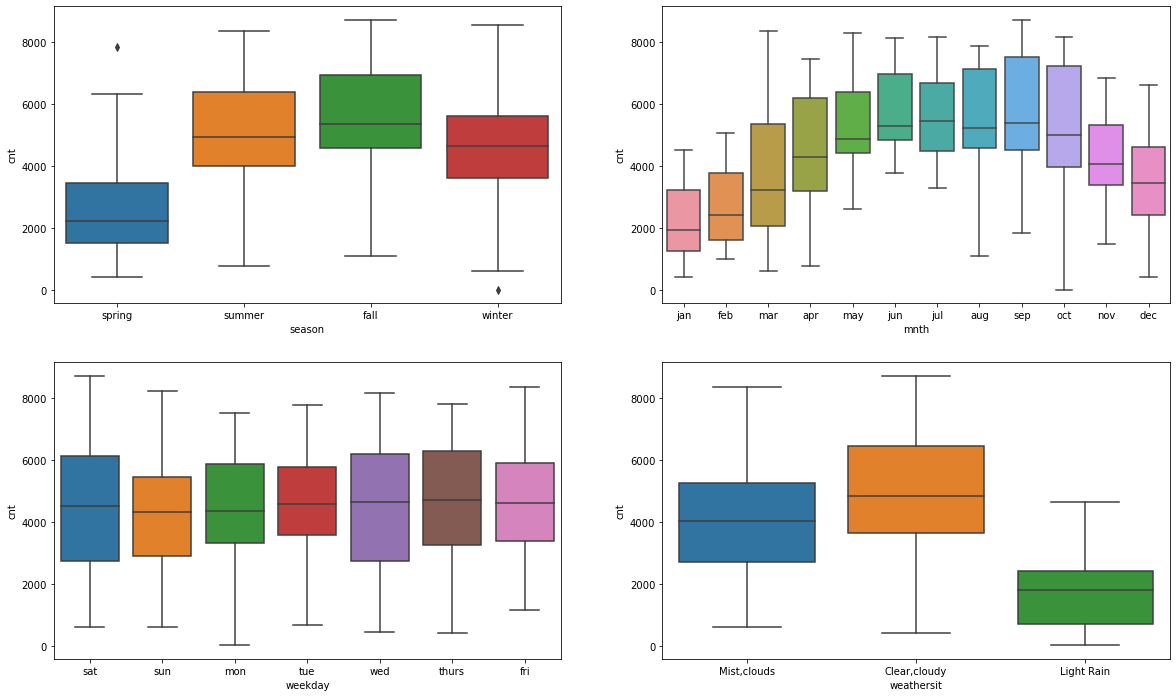

In [18]:
# visualising categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()


<font color=#2980B9  size= 3 style='font-family : courier'>
There are not much outliers for the variables
    <br>
    

</font>


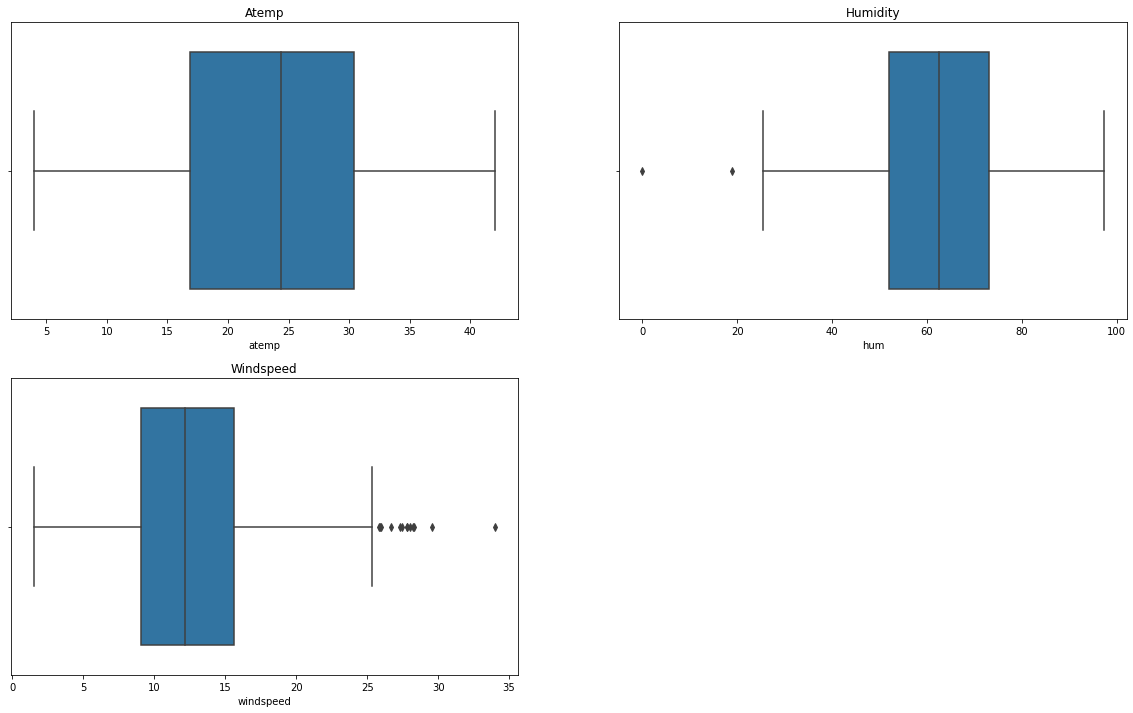

In [19]:
# box plot for numeric variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'atemp',data = bike)
plt.title('Atemp')
plt.subplot(2,2,2)
sns.boxplot(x = 'hum', data = bike)
plt.title('Humidity')
plt.subplot(2,2,3)
sns.boxplot(x = 'windspeed',  data = bike)
plt.title('Windspeed')
plt.show()



<font color=#2980B9  size= 3 style='font-family : courier'>
There are less number of out liers for windspeed and humidity
    <br>
    

</font>


In [20]:
#defining custom function 
def hist_asthetics(a = 0):
    plt.xticks(fontsize =10, color='#FDFEFE')
    plt.yticks(fontsize =10, color='#FDFEFE')
    plt.gca().spines['bottom'].set_color('#FFFFFF')
    plt.gca().spines['top'].set_color('#FFFFFF')
    plt.gca().spines['left'].set_color('#FFFFFF')
    plt.gca().spines['right'].set_color('#FFFFFF')
    for t in plt.gca().xaxis.get_ticklines(): t.set_color('#FFFFFF')
    for t in plt.gca().yaxis.get_ticklines(): t.set_color('#FFFFFF')

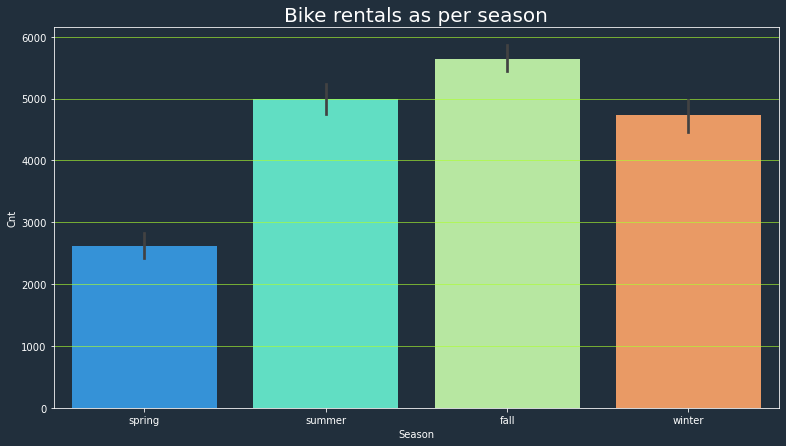

In [21]:
#bar graph for bike rentals as per season 

fig = plt.figure(figsize=(13,7))

ax = sns.barplot('season','cnt', data=bike,palette="rainbow")
ax.set_facecolor("#212F3C")
hist_asthetics(0)
plt.title("Bike rentals as per season", color='#ffffff', fontsize =20)
plt.ylabel('Cnt', color='#FDFEFE', fontsize =10)
plt.xlabel('Season', color='#FDFEFE', fontsize =10)
plt.grid(axis='y', alpha=0.75, color = '#ADFF2F')

fig.set_facecolor("#212F3C")
plt.show()




<font color=#2980B9  size= 3 style='font-family : courier'>
Highest number of rentals in ‘FALL’  season and lower in ‘spring’  season.
    <br>
    

</font>


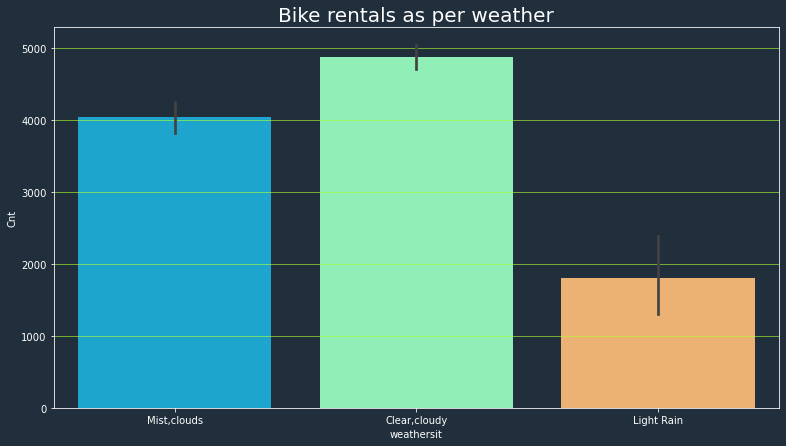

In [22]:
#bar graph for bike rentals as per weather

fig = plt.figure(figsize=(13,7))

ax = sns.barplot('weathersit','cnt', data=bike,palette="rainbow")
ax.set_facecolor("#212F3C")
hist_asthetics(0)
plt.title("Bike rentals as per weather", color='#ffffff', fontsize =20)
plt.ylabel('Cnt', color='#FDFEFE', fontsize =10)
plt.xlabel('weathersit', color='#FDFEFE', fontsize =10)
plt.grid(axis='y', alpha=0.75, color = '#ADFF2F')

fig.set_facecolor("#212F3C")
plt.show()




<font color=#2980B9  size= 3 style='font-family : courier'>
Highest number of rentals when the climate is clear and partly cloudy
    <br>
    

</font>


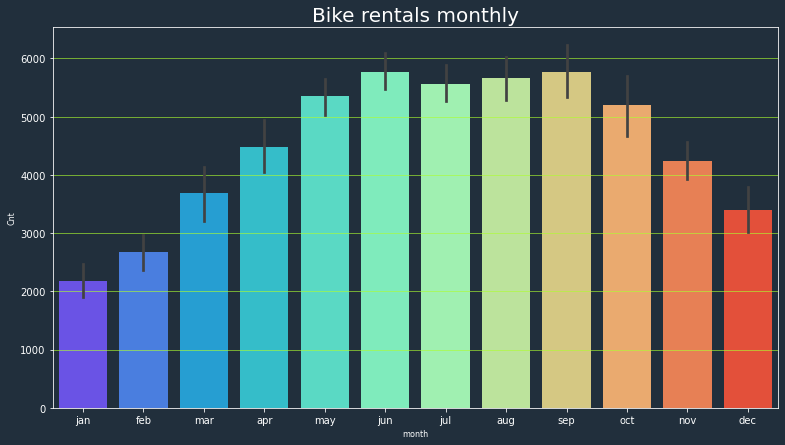

In [23]:
#Bar graph for monthly bike rentals

fig = plt.figure(figsize=(13,7))

ax = sns.barplot('mnth','cnt', data=bike,palette="rainbow")
ax.set_facecolor("#212F3C")
hist_asthetics(0)
plt.title("Bike rentals monthly", color='#ffffff', fontsize =20)
plt.ylabel('Cnt', color='#FDFEFE', fontsize =8)
plt.xlabel('month', color='#FDFEFE', fontsize =8)
plt.grid(axis='y', alpha=0.75, color = '#ADFF2F')

fig.set_facecolor("#212F3C")
plt.show()

<font color=#2980B9  size= 3 style='font-family : courier'>
At the beginning of the year i.e.., Jan , bike rentals are very low and gradually increased monthly till June and decreased in Jul and slight increase in Sep and again experienced fall till Dec.

    
    

</font>


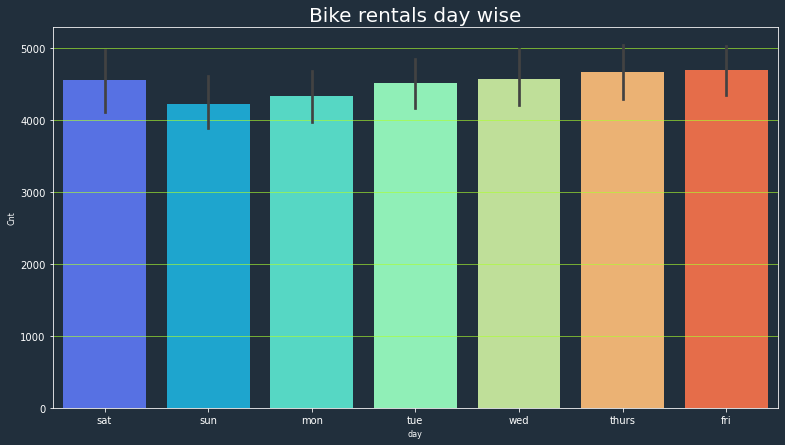

In [24]:
#day wise bike rentals bar graph
fig = plt.figure(figsize=(13,7))

ax = sns.barplot('weekday','cnt', data=bike,palette="rainbow")
ax.set_facecolor("#212F3C")
hist_asthetics(0)
plt.title("Bike rentals day wise", color='#ffffff', fontsize =20)
plt.ylabel('Cnt', color='#FDFEFE', fontsize =8)
plt.xlabel('day', color='#FDFEFE', fontsize =8)
plt.grid(axis='y', alpha=0.75, color = '#ADFF2F')

fig.set_facecolor("#212F3C")
plt.show()




<font color=#2980B9  size= 3 style='font-family : courier'>
A slight decrease in rentals on sunday and monday, remaining days bike rentals are almost same

    
    

</font>




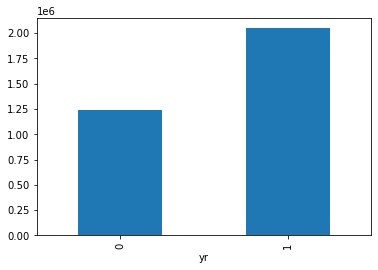

In [25]:
#sales as per year
bike.groupby('yr')['cnt'].sum().plot.bar()






<font color=#2980B9  size= 3 style='font-family : courier'>
Sales increase drastically from 2018 to 2019 

    
    

</font>




<font color = #1D8348 size = '5' style = 'font-family: Impact'>Correlation  </font>

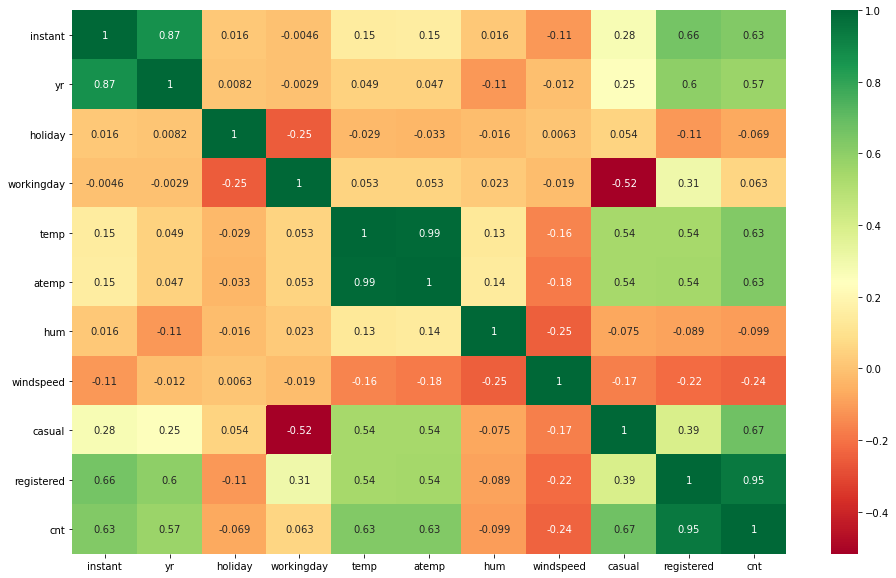

In [26]:
##Checking the correlation between variables
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="RdYlGn")
plt.show()

1. Instant is correlated to cnt and registered and highly correlated to year , we can drop instant variable
2. Temp and atemp are higly correlated and we have already dropped temp variable
3. registerd ,casual and cnt are correlated. So, we can drop as addition of registetred and casual leads to cnt number

<font color=#D35400 size=6  style = 'font-family: Georgia'><b> Data preparation</b></font>

<font color = #1D8348 size = '5' style = 'font-family: Impact'>Dummy Variables  </font>

In [27]:
##Drop the unnecessary columns.
bike.drop(columns=['instant','dteday','temp','casual','registered'],axis=1,inplace=True)

<font color=#2980B9  size= 3 style='font-family : courier'>
In this section we are dropping unnecessary variables.
    <br>
    
- <b>Instant.</b> <i> Unique value for each row. </i>
    
    
- <b>dteday.</b> <i>Information already captured..</i>
    
    
- <b>temp/atemp </b> <i> We can drop one of them as both are highly correlated which leads to Multicollinearity.. </i>

- <b>Casual,reistered.</b> <i>As they are correlated with 'cnt',which is our TARGET variable .So, they are acting as target variables and will not be available at the time of prediction..</i>

</font>

In [28]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(bike['weathersit'])

#checking weather dataframe
weather.head()


,"Clear,cloudy",Light Rain,"Mist,clouds"
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `Clear,cloudy` column, as it can be identified with just the last two columns where — 
- `00` will correspond to `Clear,cloudy`
- `01` will correspond to `Mist,clouds`
- `10` will correspond to `Light Rain`

In [29]:
# Let's drop the first column from weather df using 'drop_first = True'
weather = pd.get_dummies(bike['weathersit'],drop_first=True)
#checking weather dataframe
weather.head()



,Light Rain,"Mist,clouds"
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [30]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weather], axis = 1)


In [31]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)
#checking bike df
bike.head()


,season,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Light Rain,"Mist,clouds"
0,spring,0,jan,0,sat,0,18.18125,80.5833,10.749882,985,0,1
1,spring,0,jan,0,sun,0,17.68695,69.6087,16.652113,801,0,1
2,spring,0,jan,0,mon,1,9.47025,43.7273,16.636703,1349,0,0
3,spring,0,jan,0,tue,1,10.60610,59.0435,10.739832,1562,0,0
4,spring,0,jan,0,wed,1,11.46350,43.6957,12.522300,1600,0,0


In [32]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'
seasons = pd.get_dummies(bike['season'])
#checking seasons df
seasons[seasons.fall==1].head(2)


,fall,spring,summer,winter
171,1,0,0,0
172,1,0,0,0


In [33]:
seasons[seasons.spring==1].head(2)

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0


In [34]:
seasons[seasons.summer==1].head(2)

,fall,spring,summer,winter
79,0,0,1,0
80,0,0,1,0


In [35]:
seasons[seasons.winter==1].head(2)

,fall,spring,summer,winter
265,0,0,0,1
266,0,0,0,1


Now, you don't need 4 columns. You can drop the `fall` column, as it can be identified with just the last 3 columns where — 
- `000` will correspond to `fall`
- `001` will correspond to `spring`
- `010` will correspond to `summer`
- `100` will correspond to `winter`

In [36]:
# Let's drop the first column from seasons df using 'drop_first = True'
seasons = pd.get_dummies(bike['season'], drop_first = True)



In [37]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, seasons], axis = 1)


In [38]:
# Drop 'season' as we have created the dummies for it
bike.drop(['season'], axis = 1, inplace = True)
bike.head()


,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Light Rain,"Mist,clouds",spring,summer,winter
0,0,jan,0,sat,0,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,jan,0,sun,0,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,jan,0,mon,1,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,jan,0,tue,1,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,jan,0,wed,1,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [39]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(bike['mnth'])


In [40]:
# Let's drop the first column from month df using 'drop_first = True'

month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [41]:
# Drop 'season' as we have created the dummies for it
bike.drop(['mnth'], axis = 1, inplace = True)


In [42]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, month], axis = 1)
bike.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Light Rain,"Mist,clouds",...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sat,0,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,17.68695,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'day'
day = pd.get_dummies(bike['weekday'])



In [44]:
# Let's drop the first column from day df using 'drop_first = True'

day = pd.get_dummies(bike['weekday'], drop_first = True)

In [45]:
# Drop 'weekday' as we have created the dummies for it
bike.drop(['weekday'], axis = 1, inplace = True)


In [46]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, day], axis = 1)



In [47]:
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Light Rain,"Mist,clouds",spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tue,wed
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,1



<font color = #1D8348 size = '5' style = 'font-family: Impact'> Splitting the Data into Training and Testing Sets </font>

In [48]:


# We specify this so that the train and test data set always have the same rows, respectively

#Splitting the dataset to test and train
np.random.seed(10)
df_train,df_test = train_test_split(bike,train_size=0.7,test_size = 0.3,random_state = 100)


In [49]:
#Checking the shape of train data set
df_train.shape

(510, 29)



<font color = #1D8348 size = '5' style = 'font-family: Impact'> Rescaling the features </font>

In [50]:

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaler = MinMaxScaler()



In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


<font color = #1D8348 size = '5' style = 'font-family: Impact'> Dividing into X and Y sets for the model building</font>

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train



<font color=#D35400 size=6  style = 'font-family: Georgia'><b>Model Buidling</b></font>


<font color = #1D8348 size = '5' style = 'font-family: Impact'> RFE (Recursive feature elimination) </font>

In [53]:
# creating a linear model using sklearn linear regression function
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Rain', True, 1),
 ('Mist,clouds', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 7),
 ('mar', False, 14),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thurs', False, 11),
 ('tue', False, 10),
 ('wed', False, 13)]

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Light Rain',
       'Mist,clouds', 'spring', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep',
       'sat'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sun', 'thurs', 'tue', 'wed'],
      dtype='object')

### Running first model

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()     
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          9.67e-187
Time:                        15:54:13   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3662      0.032     11.425      

<font color=#2980B9  size= 3 style='font-family : courier'>
sat seems to be insignificant in presence of other variables and can be dropped
<font>

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.75
3,atemp,3.39
8,spring,2.69
9,winter,2.30
4,hum,1.92
13,nov,1.70
11,jan,1.65
7,"Mist,clouds",1.57
10,dec,1.45
12,jul,1.30


### Running Second model

In [59]:
X_train_new = X_train_rfe.drop(['sat'], axis = 1)

In [60]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.58e-187
Time:                        15:54:13   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3704      0.032     11.578      

In [61]:
# drop constant 
X_train_new = X_train_new.drop(['const'], axis=1)

In [62]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
8,winter,2.93
7,spring,2.89
6,"Mist,clouds",2.26
0,yr,2.06
12,nov,1.82
10,jan,1.75
9,dec,1.54


<font color=#2980B9  size= 3 style='font-family : courier'>
VIF for the variable hum is high  and can be dropped
<font>

### Running third model

In [63]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [64]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.95e-185
Time:                        15:54:13   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2931      0.026     11.396      

In [65]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
7,winter,2.55
6,spring,2.35
0,yr,2.06
11,nov,1.80
9,jan,1.65
5,"Mist,clouds",1.53
8,dec,1.46
10,jul,1.35


<font color=#2980B9  size= 3 style='font-family : courier'>
atemp variable has VIF value less than 5, but we can drop it for better model
<font>

### Running fourth model

In [66]:
X_train_new = X_train_new.drop(['atemp'], axis=1)

In [67]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          7.86e-159
Time:                        15:54:13   Log-Likelihood:                 434.31
No. Observations:                 510   AIC:                            -842.6
Df Residuals:                     497   BIC:                            -787.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5678      0.013     42.379      

<font color=#2980B9  size= 3 style='font-family : courier'>
Winter and Jul variables p values are increased and can be dropped.Lets drop winter and check the model
<font>

In [68]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.63
6,winter,2.52
5,spring,2.30
10,nov,1.78
0,yr,1.76
8,jan,1.64
4,"Mist,clouds",1.46
7,dec,1.45
11,sep,1.12
9,jul,1.10


### Running fifth model

In [69]:
X_train_new = X_train_new.drop(['winter'], axis=1)

In [70]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm5= sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          6.64e-160
Time:                        15:54:13   Log-Likelihood:                 434.19
No. Observations:                 510   AIC:                            -844.4
Df Residuals:                     498   BIC:                            -793.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5696      0.013     44.153      

In [71]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.54
5,spring,2.12
0,yr,1.74
7,jan,1.62
4,"Mist,clouds",1.44
9,nov,1.16
10,sep,1.11
6,dec,1.10
8,jul,1.09
1,holiday,1.06


In [72]:
### Running sixth model

In [73]:
X_train_new = X_train_new.drop(['jul'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm6.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          5.82e-161
Time:                        15:54:13   Log-Likelihood:                 433.99
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5719      0.012     46.206      

In [74]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,windspeed,2.47
5,spring,2.09
0,yr,1.72
7,jan,1.62
4,"Mist,clouds",1.44
8,nov,1.15
9,sep,1.11
6,dec,1.10
1,holiday,1.06
3,Light Rain,1.06



<font color=#2980B9  size= 3 style='font-family : courier'>
Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

 As vif values are < 5 , there is no multi collinearity among the variables
<font>



<font color = #1D8348 size = '5' style = 'font-family: Impact'> Residual Analysis of the train data </font>

We will check if the error terms are also normally distributed (one of the major assumptions of linear regression.

In [75]:
y_train_cnt = lm6.predict(X_train_lm)
res=y_train - y_train_cnt

### Validating assumptions

Text(0.5, 0, 'Errors')

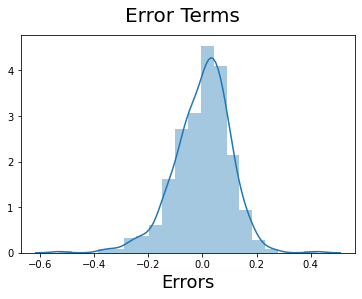

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Error terms are normally distributed with mean value near to zero

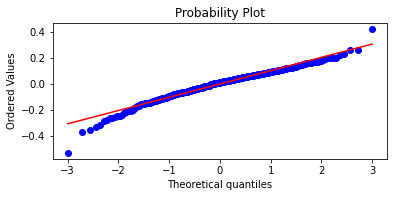

In [77]:

fig,ax=plt.subplots(figsize=(6,2.5))
_,(_,_,r)=sp.stats.probplot(res,plot=ax,fit=True)


<font color = #1D8348 size = '5' style = 'font-family: Impact'> Homoscedasticity </font>

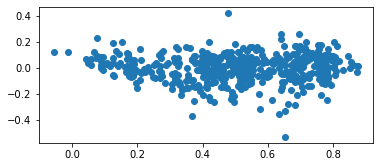

In [78]:

fig,ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(y_train_cnt,res)

#### There is  no pattern based on residuals and Y train and most of the values are centered around zero


<font color = #1D8348 size = '5' style = 'font-family: Impact'> No auto Correlation of residuals </font>

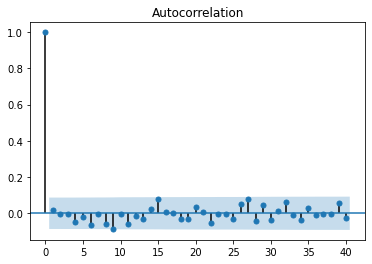

In [79]:

acf=smt.graphics.plot_acf(res,lags=40,alpha=0.05)
acf.show()

1. Every signal is auto correlated with it self.
2. Blue border indicates the thresh hold value , and none of the values have crossed the the thresh hold value.So, There is no auto correlation between residuals.


<font color = #1D8348 size = '5' style = 'font-family: Impact'> Making Predictions Using the Final Model </font>

In [80]:
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])# ( only transforming data set not fitting)

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [81]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Light Rain,"Mist,clouds",spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.027397,0.319635,0.255708,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.163612,0.467403,0.437258,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
# Making predictions
y_pred = lm6.predict(X_test_new)
residual=y_test-y_pred

Text(0.5, 0, 'Errors')

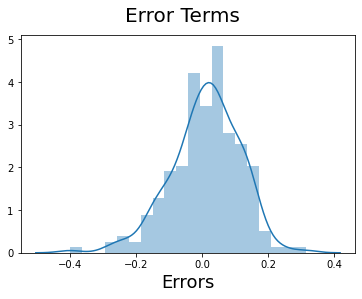

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

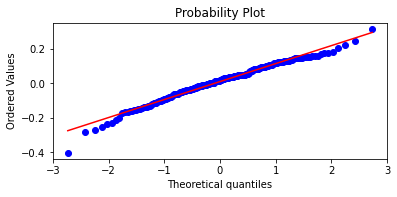

In [86]:

fig,ax=plt.subplots(figsize=(6,2.5))
_,(_,_,r)=sp.stats.probplot(residual,plot=ax,fit=True)


<font color = #1D8348 size = '5' style = 'font-family: Impact'> Model evalutaion </font>

#### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

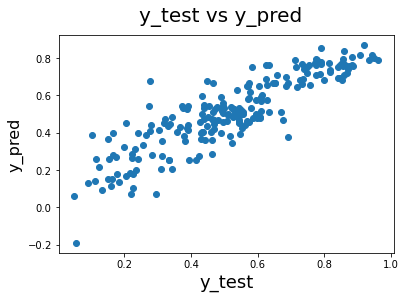

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [88]:
# comparing the predicted y_test and actual y-test to obtain R2 score.

r2_score(y_true=y_test,y_pred=y_pred)

0.7692911456361967

#### We can see that R^2 and adjsted R^2 are almost same.


We can see that the equation of our best fitted line is:

$ cnt = 0.246  \times  year - 0.086 \times  holiday - 0.206 \times windspeed - 0.310 \times light snow,rain  - 0.090 \times mist,clouds - 0.2202 \times spring - 0.1047 \times dec - 0.1203 \times jan - 0.0929 \times nov + 0.0770 \times sep $


Inferences
1. windspeed: As the windspeed increases, it will be difficult to ride a bike.
2. Spring : Since spring is from mid of the december to mid of the march,there will be decrease in rentals as there will be holidays (christmas).
3. yr: Rentals are increasing from year to year as people are getting to know about the services.
4. jan:Rentals are very low in january, as it is winter season and may be because of less temperatures.
5. Clody+mist:The cloudy weather with mist may be  reduce the bike rentals.
6. nov: Since nov is winter there is a chance of decrease in bike rentals
7. Sep: sep is fall season and will be  favourable for bike rides, there can be increase in rentals
8. dec: Most people will go for vacation may be because of christmas holidays , there can be huge decline of bike rentals.
9. holiday: If there is a holiday only 20% people rented bikes. So, mostly people are renting bikes on working days.
10. Light Rain: The rentals will decrease if there is a rain.